# Estadística descriptiva con Python

#### Vamos a leer un conjunto de datos

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('iris_data.txt', sep=",")

Cabecera de la tabla para hacernos una idea de cómo es:

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#### Tipos de datos en Python:
    

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Más información acerca de mi tabla:

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Tabla de frecuencias:

Vamos a generarla para la variable petal_width

Vemos antes de nada cómo es esta variable:

In [8]:
iris['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

Esta variable la vamos a categorizar convirtiéndola en una con tres categorías:
    - que el valor sea <=1
    - que el valor esté entre 1 y 2
    - que el valor sea >= 2
sabiendo que el mínimo es 1 y el máximo 2.5.

In [9]:
iris['nueva_variable'] = 'sin categoria'
iris.loc[(iris.petal_width<=1),'nueva_variable'] = '1. <= 1' 
iris.loc[(iris.petal_width>1) & (iris.petal_width<2),'nueva_variable'] = '2. 1-2' 
iris.loc[(iris.petal_width>=2),'nueva_variable'] = '3. >= 2' 

Vemos cómo queda ahora el dataframe con la nueva variable:

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable
0,5.1,3.5,1.4,0.2,setosa,1. <= 1
1,4.9,3.0,1.4,0.2,setosa,1. <= 1
2,4.7,3.2,1.3,0.2,setosa,1. <= 1
3,4.6,3.1,1.5,0.2,setosa,1. <= 1
4,5.0,3.6,1.4,0.2,setosa,1. <= 1


In [11]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable
145,6.7,3.0,5.2,2.3,virginica,3. >= 2
146,6.3,2.5,5.0,1.9,virginica,2. 1-2
147,6.5,3.0,5.2,2.0,virginica,3. >= 2
148,6.2,3.4,5.4,2.3,virginica,3. >= 2
149,5.9,3.0,5.1,1.8,virginica,2. 1-2


Ahora voy a crear la tabla de frecuencias. 
En particular, calculo las frecuencias absolutas:

In [12]:
frecuencias = pd.crosstab(index=iris["nueva_variable"],columns="frec_abs")

#frecuencias = iris.groupby("nueva_variable").size().reset_index(name='frec_abs')
#frecuencias = pd.value_counts(iris['nueva_variable'])

print(frecuencias)
type(frecuencias)

col_0           frec_abs
nueva_variable          
1. <= 1               57
2. 1-2                64
3. >= 2               29


pandas.core.frame.DataFrame

Añado las frecuencias relativas:

In [13]:
frecuencias["frec_rel"] = iris["nueva_variable"].value_counts() / len(iris["nueva_variable"])

Añado las frecuencias porcentuales:

In [14]:
frecuencias["frec_por"] = 100* frecuencias["frec_rel"]
print(frecuencias)

col_0           frec_abs  frec_rel   frec_por
nueva_variable                               
1. <= 1               57  0.380000  38.000000
2. 1-2                64  0.426667  42.666667
3. >= 2               29  0.193333  19.333333


In [15]:
frecuencias_acum = frecuencias[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
print(frecuencias_acum)
#Esto sería haciendo también el acumulado de frec_por
#frecuencias_acum = frecuencias.cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum", "frec_por":"frec_por_acum"})

col_0           frec_abs_acum  frec_rel_acum
nueva_variable                              
1. <= 1                  57.0       0.380000
2. 1-2                  121.0       0.806667
3. >= 2                 150.0       1.000000


In [16]:
tabla_frecuencias = pd.concat([frecuencias, frecuencias_acum], axis=1) # 1 es columna
print(tabla_frecuencias)

col_0           frec_abs  frec_rel   frec_por  frec_abs_acum  frec_rel_acum
nueva_variable                                                             
1. <= 1               57  0.380000  38.000000           57.0       0.380000
2. 1-2                64  0.426667  42.666667          121.0       0.806667
3. >= 2               29  0.193333  19.333333          150.0       1.000000


### $\color{red}{\text{Ejercicio 1: Calcular las tablas de frecuencias para el resto de variables del dataframe.}}$

Tabla de frecuencias para `petal_length`

In [17]:
iris['petal_length'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [18]:
# petal_length varía entre 1 y 6.9

iris['nueva_variable_2'] = 'sin categoria'
iris.loc[(iris.petal_length<=3),'nueva_variable_2'] = '1. <= 3' 
iris.loc[(iris.petal_length>3) & (iris.petal_length<5),'nueva_variable_2'] = '2. 3-5' 
iris.loc[(iris.petal_length>=5),'nueva_variable_2'] = '3. >= 5' 

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable,nueva_variable_2
0,5.1,3.5,1.4,0.2,setosa,1. <= 1,1. <= 3
1,4.9,3.0,1.4,0.2,setosa,1. <= 1,1. <= 3
2,4.7,3.2,1.3,0.2,setosa,1. <= 1,1. <= 3
3,4.6,3.1,1.5,0.2,setosa,1. <= 1,1. <= 3
4,5.0,3.6,1.4,0.2,setosa,1. <= 1,1. <= 3


In [20]:
frecuencias_2 = pd.crosstab(index=iris["nueva_variable_2"],columns="frec_abs_2")

print(frecuencias_2)

col_0             frec_abs_2
nueva_variable_2            
1. <= 3                   51
2. 3-5                    53
3. >= 5                   46


In [21]:
frecuencias_2["frec_rel_2"] = iris["nueva_variable_2"].value_counts() / len(iris["nueva_variable_2"])

In [22]:
frecuencias_2["frec_por_2"] = 100* frecuencias_2["frec_rel_2"]
print(frecuencias_2)

col_0             frec_abs_2  frec_rel_2  frec_por_2
nueva_variable_2                                    
1. <= 3                   51    0.340000   34.000000
2. 3-5                    53    0.353333   35.333333
3. >= 5                   46    0.306667   30.666667


In [23]:
frecuencias_acum_2 = frecuencias_2[["frec_abs_2","frec_rel_2"]].cumsum().rename(columns={"frec_abs_2":"frec_abs_acum_2","frec_rel_2":"frec_rel_acum_2"})
print(frecuencias_acum_2)

col_0             frec_abs_acum_2  frec_rel_acum_2
nueva_variable_2                                  
1. <= 3                      51.0         0.340000
2. 3-5                      104.0         0.693333
3. >= 5                     150.0         1.000000


In [24]:
tabla_frecuencias_2 = pd.concat([frecuencias_2, frecuencias_acum_2], axis=1) # 1 es columna
print(tabla_frecuencias_2)

col_0             frec_abs_2  frec_rel_2  frec_por_2  frec_abs_acum_2  \
nueva_variable_2                                                        
1. <= 3                   51    0.340000   34.000000             51.0   
2. 3-5                    53    0.353333   35.333333            104.0   
3. >= 5                   46    0.306667   30.666667            150.0   

col_0             frec_rel_acum_2  
nueva_variable_2                   
1. <= 3                  0.340000  
2. 3-5                   0.693333  
3. >= 5                  1.000000  


### $\color{red}{\text{Ejercicio 2: Calcular frecuencias absolutas y relativas combinadas de dos variables.}}$

In [25]:
##consultar vbles declaradas
#dir()
#
##borrar
#%reset -f
#del(vble)

In [26]:
tab = pd.crosstab(iris["species"], iris["nueva_variable"], margins = True)
tab

nueva_variable,1. <= 1,2. 1-2,3. >= 2,All
species,,,,
setosa,50,0,0,50
versicolor,7,43,0,50
virginica,0,21,29,50
All,57,64,29,150


In [27]:
tab_2 = pd.crosstab(iris["species"],iris["nueva_variable_2"], margins = True)
tab_2

nueva_variable_2,1. <= 3,2. 3-5,3. >= 5,All
species,,,,
setosa,50,0,0,50
versicolor,1,47,2,50
virginica,0,6,44,50
All,51,53,46,150


### Medidas de posición centrales:

Vamos a calcular la media y la mediana de la variable "sepal_length" y la moda de la variable "species"

In [28]:
iris[["sepal_length"]].mean()

sepal_length    5.843333
dtype: float64

In [29]:
iris[["sepal_length"]].median()

sepal_length    5.8
dtype: float64

Parece que los valores de la media y la mediana son muy próximos.

In [30]:
iris[["species"]].mode()

,species
0,setosa
1,versicolor
2,virginica


¿Qué está pasando?

Vamos a sacarnos una tabla con el número de registros de cada clase para ver por qué no me está sacando el que más se repite:

In [31]:
pd.value_counts(iris['species'])

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Es una variable trimodal (tiene 3 modas)

Veamos cuál es la moda de la variable que creamos para categorizar nuestra vble original "petal_width"

In [32]:
iris[["nueva_variable"]].mode()

,nueva_variable
0,2. 1-2


Esta variable sí que tiene una única moda.

In [34]:
# También en la otra variable creada

iris[["nueva_variable_2"]].mode()

,nueva_variable_2
0,2. 3-5


### Medidas de posición no centrales:

Veamos los cuartiles:

In [35]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Donde: 
- cuartil 1 se corresponde con el 25%, 
- cuartil 2 con el 50%, que a su vez es la mediana, 
- cuartil 3 con el 75% y 
- cuartil 4 con el max

El rango intercuartílico (RI) `(Q3 - Q1)` se suele utilizar para clasificar/detectar outliers.

Por ejemplo, como criterio, si se aleja 1.5 veces el RI se considera outlier.

Vemos por tanto que de esta forma, además de los cuartiles, también obtenemos la media (mean) y la mediana (50%) de forma directa.

Calculemos los percentiles:

In [36]:
iris.quantile(0.50)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

### $\color{red}{\text{Ejercicio 3: Calcular el Rango Intercuartílico de cada variable.}}$

In [40]:
iris['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [39]:
RI_sepal_length = iris['sepal_length'].quantile(0.75) - iris['sepal_length'].quantile(0.25)
print(iris['sepal_length'].quantile(0.75))
print(iris['sepal_length'].quantile(0.25))
RI_sepal_length

6.4
5.1


1.3000000000000007

In [46]:
RI_sepal_width = iris['sepal_width'].quantile(0.75) - iris['sepal_width'].quantile(0.25)
RI_sepal_width

0.5

In [44]:
RI_petal_length = iris['petal_length'].quantile(0.75) - iris['petal_length'].quantile(0.25)
RI_petal_length

3.4999999999999996

In [45]:
RI_petal_width = iris['petal_width'].quantile(0.75) - iris['petal_width'].quantile(0.25)
RI_petal_width

1.5

In [50]:
print(f'El RI de sepal_length es: {RI_sepal_length}')
print(f'El RI de sepal_width es: {RI_sepal_width}')
print(f'El RI de petal_length es: {RI_petal_length}')
print(f'El RI de petal_width es: {RI_petal_width}')

El RI de sepal_length es: 1.3000000000000007
El RI de sepal_width es: 0.5
El RI de petal_length es: 3.4999999999999996
El RI de petal_width es: 1.5


### Ejemplos de dispersión:
Media = 140; Desviación Típica = 28.28  
Media = 150; Desviación Típica = 24  
Coeficiente de variación de Pearson = Desviación típica / Media

In [52]:
Disp_1 = 28.28 / 140
Disp_1

0.202

In [54]:
Disp_2 = 24 / 150
Disp_2

0.16

### Medidas de dispersión:

Calculamos el **rango** de la variable 'sepal_length':

In [55]:
iris[['sepal_length']].max() - iris[['sepal_length']].min()

sepal_length    3.6
dtype: float64

Calculamos la **varianza** de la variable 'sepal_length':

In [56]:
iris[['sepal_length']].var()

sepal_length    0.685694
dtype: float64

Calculamos la **desviación típica** de la variable 'sepal_length':

In [57]:
iris[['sepal_length']].std()

sepal_length    0.828066
dtype: float64

Podemos además representar las variables gráficamente utilizando un `boxplot`, para tener una visión de cómo de dispersas están nuestras variables.

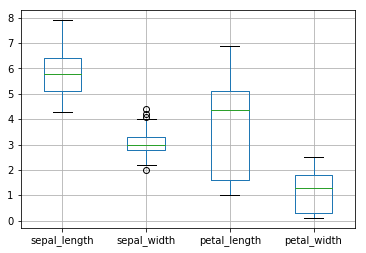

In [61]:
boxplot = iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
boxplot

### $\color{red}{\text{Ejercicio 4: Calcular rango, varianza y desviación típica de cada variable.}}$

In [73]:
print(iris[['sepal_length']].max() - iris[['sepal_length']].min())
print(iris[['sepal_length']].var())
print(iris[['sepal_length']].std())

sepal_length    3.6
dtype: float64
sepal_length    0.685694
dtype: float64
sepal_length    0.828066
dtype: float64


In [63]:
print(iris[['sepal_width']].max() - iris[['sepal_width']].min())
print(iris[['sepal_width']].var())
print(iris[['sepal_width']].std())

sepal_width    2.4
dtype: float64
sepal_width    0.188004
dtype: float64
sepal_width    0.433594
dtype: float64


In [64]:
print(iris[['petal_length']].max() - iris[['petal_length']].min())
print(iris[['petal_length']].var())
print(iris[['petal_length']].std())

petal_length    5.9
dtype: float64
petal_length    3.113179
dtype: float64
petal_length    1.76442
dtype: float64


In [65]:
print(iris[['petal_width']].max() - iris[['petal_width']].min())
print(iris[['petal_width']].var())
print(iris[['petal_width']].std())

petal_width    2.4
dtype: float64
petal_width    0.582414
dtype: float64
petal_width    0.763161
dtype: float64


### $\color{red}{\text{Ejercicio 5: Calcular el coeficiente de variación de Pearson de cada variable para concluir cuál es la que presenta menor variación con respecto a las demás.}}$

### Medidas de forma:

Vamos a calcular el **coeficiente de asimetría** de cada una de las variables mediante la función `skew`:

In [58]:
iris.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

Vamos a calcular la **curtosis** de cada variable con el método `.kurt()`. 
<br>Este método resta 3 automáticamente, de manera que la comparación la hacemos con 0 o le podemos sumar 3 y comparar como habíamos especificado antes con 3.

In [59]:
iris.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

### $\color{red}{\text{Ejercicio 6: Representar gráficamente las distribuciones de estas variables marcando dónde están su media y su mediana.}}$

### Correlación entre variables:

In [82]:
iris.corr(method='pearson') # Por defecto

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [83]:
iris.corr(method='kendall')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.072112,0.717624,0.654960
sepal_width,-0.072112,1.000000,-0.182391,-0.146988
petal_length,0.717624,-0.182391,1.000000,0.803014
petal_width,0.654960,-0.146988,0.803014,1.000000


Representemos visualmente la correlación existente entre sepal_length y sepal_width con un gráfico de dispersión.
<br> Para ello vamos a cargar la libreria matplotlib

In [75]:
import matplotlib.pyplot as plt

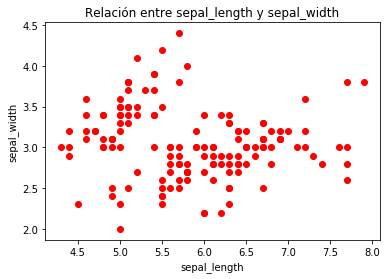

In [86]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width, c = 'red')
plt.title('Relación entre sepal_length y sepal_width')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

Ni a través del coeficiente ni gráficamente se aprecia relación entre estas dos variables. 
<br> Intentemos representarlo de nuevo pero distinguiendo según la especie.

In [87]:
# Creamos el vector de colores, para que, en función de la vble class pinte los puntos de un color u otro
colores = {"setosa":"RoyalBlue", "versicolor":"Crimson","virginica":"DarkGreen"}
class_colores = iris['species'].map(colores)

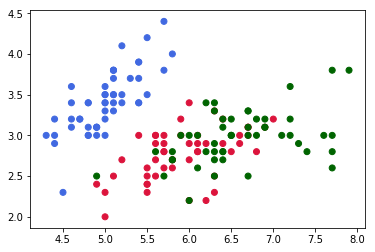

In [92]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width, color=class_colores)
plt.show()

Vamos a añadirle la leyenda para saber de qué especie o clase estamos hablando en cada caso:

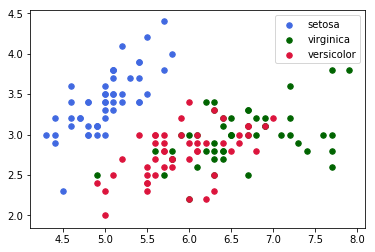

In [93]:
fig, ax = plt.subplots()
for species in set(iris['species']):
    ax.scatter(
        iris.sepal_length[iris.species == species],
        iris.sepal_width[iris.species == species],
        s = 30,
        c = colores[species],
        label = species)
plt.legend()
plt.show()

In [95]:
tabla_corr = iris[iris.species == "setosa"].corr()
tabla_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000
